In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'


In [2]:
df_flags = pd.read_csv(url)

In [3]:
columns = ['name', 'landmass', 'zone', 
           'area', 'population', 'lang', 'religion',
          'bars', 'stripes', 'colours', 'red',
          'green', 'blue', 'gold', 'white',
          'black', 'orange', 'mainhue', 'cicrles',
          'crosses', 'saltires', 'quartets', 'sunstars', 'crescent',
          'triangle', 'icon', 'animate', 'text',
          'topleft', 'botright']

In [4]:
df_flags.columns = columns

In [5]:
df_flags.head()

,name,landmass,zone,area,population,lang,religion,bars,stripes,colours,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [6]:
targets = df_flags.landmass

In [7]:
data = df_flags.drop(['landmass'], axis=1)
data = df_flags.drop(['name'], axis=1)

In [8]:
data.mainhue.unique()

array(['red', 'green', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

In [9]:
data.topleft.unique()

array(['red', 'green', 'blue', 'white', 'black', 'orange', 'gold'],
      dtype=object)

In [10]:
data.botright.unique()

array(['red', 'white', 'black', 'blue', 'green', 'gold', 'orange',
       'brown'], dtype=object)

In [11]:
topleft = {'red': 1,'green': 2,'blue': 3,'white': 4,'black': 5,
         'orange': 6, 'gold': 7} 
botright = {'red': 1,'white': 2,'black': 3,'blue': 4,'green': 5,
         'orange': 6, 'gold': 7, 'brown': 8} 
mainhue = {'red': 1,'green': 2,'blue': 3,'gold': 4,
           'white': 5,'orange': 5,
         'black': 6, 'brown': 7} 
data.topleft = [topleft[item] for item in data.topleft]
data.botright = [botright[item] for item in data.botright]
data.mainhue = [mainhue[item] for item in data.mainhue]
new_data = data
new_data.head()

,landmass,zone,area,population,lang,religion,bars,stripes,colours,red,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,1,1
1,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,2,2
2,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,3,1
3,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,3,1
4,4,2,1247,7,10,5,0,2,3,1,...,0,0,1,0,0,1,0,0,1,3


In [12]:
from sklearn.model_selection import train_test_split
X = new_data
y = targets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2,random_state=20)

In [13]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_predict = svc_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6]))
confusion = pd.DataFrame(cm, index = ['N.America', 'S.America', 
                                      'Europe', 'Africa', 'Asia',
                                     'Oceania'], 
                         columns = ['predicted N.America', 
                                    'predicted S.America', 
                                      'predicted Europe', 
                                    'predicted Africa',
                                    'predicted Asia',
                                     'predicted Oceania'])
confusion

,predicted N.America,predicted S.America,predicted Europe,predicted Africa,predicted Asia,predicted Oceania
N.America,2,0,0,2,0,0
S.America,0,0,0,3,0,0
Europe,0,0,3,6,1,0
Africa,0,0,0,12,0,0
Asia,0,0,0,7,0,0
Oceania,0,0,0,3,0,0


In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         3
           3       1.00      0.30      0.46        10
           4       0.36      1.00      0.53        12
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3

    accuracy                           0.44        39
   macro avg       0.39      0.30      0.28        39
weighted avg       0.47      0.44      0.35        39



/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
X_train_min = X_train.min()
X_train_min

landmass      1
zone          1
area          0
population    0
lang          1
religion      0
bars          0
stripes       0
colours       1
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       1
cicrles       0
crosses       0
saltires      0
quartets      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       1
botright      1
dtype: int64

In [19]:
X_train_max = X_train.max()
X_train_max

landmass          6
zone              4
area          22402
population     1008
lang             10
religion          7
bars              3
stripes          13
colours           8
red               1
green             1
blue              1
gold              1
white             1
black             1
orange            1
mainhue           7
cicrles           4
crosses           2
saltires          1
quartets          1
sunstars         50
crescent          1
triangle          1
icon              1
animate           1
text              1
topleft           7
botright          8
dtype: int64

In [20]:
X_train_range = (X_train_max - X_train_min)
X_train_range

landmass          5
zone              3
area          22402
population     1008
lang              9
religion          7
bars              3
stripes          13
colours           7
red               1
green             1
blue              1
gold              1
white             1
black             1
orange            1
mainhue           6
cicrles           4
crosses           2
saltires          1
quartets          1
sunstars         50
crescent          1
triangle          1
icon              1
animate           1
text              1
topleft           6
botright          7
dtype: int64

In [21]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,landmass,zone,area,population,lang,religion,bars,stripes,colours,red,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
147,0.6,0.333333,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.285714,1.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.571429
108,1.0,0.000000,0.000000,0.000000,1.000000,0.142857,0.0,0.000000,0.285714,0.0,...,0.0,0.0,0.02,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571
167,0.8,0.000000,0.001607,0.017857,0.666667,0.428571,0.0,0.000000,0.285714,1.0,...,0.0,1.0,0.02,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000
134,0.2,0.666667,0.018168,0.002976,0.111111,0.000000,0.0,0.230769,0.714286,1.0,...,0.0,0.0,0.02,0.0,0.0,1.0,1.0,1.0,0.000000,0.428571
122,1.0,0.333333,0.011963,0.001984,0.000000,0.142857,0.0,0.000000,0.285714,1.0,...,1.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.500000,0.428571


In [22]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [23]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [25]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6]))
confusion = pd.DataFrame(cm, index = ['N.America', 'S.America', 
                                      'Europe', 'Africa', 'Asia',
                                     'Oceania'], 
                         columns = ['predicted N.America', 
                                    'predicted S.America', 
                                      'predicted Europe', 
                                    'predicted Africa',
                                    'predicted Asia',
                                     'predicted Oceania'])
confusion

,predicted N.America,predicted S.America,predicted Europe,predicted Africa,predicted Asia,predicted Oceania
N.America,4,0,0,0,0,0
S.America,3,0,0,0,0,0
Europe,0,0,3,3,4,0
Africa,0,0,0,10,2,0
Asia,0,0,0,3,4,0
Oceania,0,0,0,1,0,2


In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         3
           3       1.00      0.30      0.46        10
           4       0.59      0.83      0.69        12
           5       0.40      0.57      0.47         7
           6       1.00      0.67      0.80         3

    accuracy                           0.59        39
   macro avg       0.59      0.56      0.52        39
weighted avg       0.64      0.59      0.55        39



/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
df_flags.head()

,name,landmass,zone,area,population,lang,religion,bars,stripes,colours,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [28]:
new_df_flags = df_flags.reset_index(drop=True)
new_df_flags.head(10)

,name,landmass,zone,area,population,lang,religion,bars,stripes,colours,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
5,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
6,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
7,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
8,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue
9,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue


/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


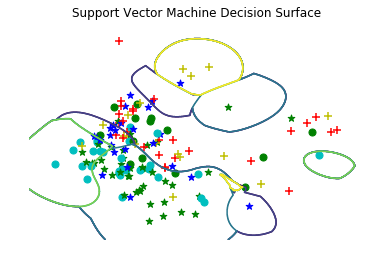

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl
data1 = new_df_flags
data1 = data1.drop(['name'], axis=1)
topleft = {'red': 1,'green': 2,'blue': 3,'white': 4,'black': 5,
         'orange': 6, 'gold': 7} 
botright = {'red': 1,'white': 2,'black': 3,'blue': 4,'green': 5,
         'orange': 6, 'gold': 7, 'brown': 8} 
mainhue = {'red': 1,'green': 2,'blue': 3,'gold': 4,
           'white': 5,'orange': 5,
         'black': 6, 'brown': 7} 
data1.topleft = [topleft[item] for item in data1.topleft]
data1.botright = [botright[item] for item in data1.botright]
data1.mainhue = [mainhue[item] for item in data1.mainhue]
targets1 = data1.iloc[:,0]
data1 = data1.drop(['landmass'], axis=1)
X = data1.to_numpy()
X = StandardScaler().fit_transform(X)
y = targets1.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2,random_state=20)
pca_train = PCA(n_components=2).fit(X_train)
X_train = pca_train.transform(X_train)
pca_test = PCA(n_components=2).fit(X_test)
X_test = pca_train.transform(X_test)
for i in range(0, X_train.shape[0]):
    if y_train[i] == 1:
        c1 = pl.scatter(X_train[i,0], X_train[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 2:
        c2 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 3:
        c3 = pl.scatter(X_train[i,0], X_train[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 4:
        c4 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='*')
    elif y_train[i] == 5:
        c5 = pl.scatter(X_train[i,0], X_train[i,1],c='c',    s=50,marker='o')
    elif y_train[i] == 6:
        c6 = pl.scatter(X_train[i,0], X_train[i,1],c='y',    s=50,marker='+') 
new_svc_model = SVC()
new_svc_model.fit(X_train, y_train)
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = new_svc_model.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [30]:
from sklearn.svm import SVC
C = 1.0
svc = SVC(kernel='linear', C=C)

In [31]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

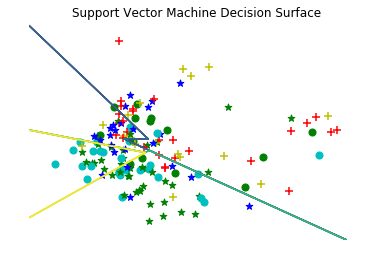

In [32]:
for i in range(0, X_train.shape[0]):
    if y_train[i] == 1:
        c1 = pl.scatter(X_train[i,0], X_train[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 2:
        c2 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 3:
        c3 = pl.scatter(X_train[i,0], X_train[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 4:
        c4 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='*')
    elif y_train[i] == 5:
        c5 = pl.scatter(X_train[i,0], X_train[i,1],c='c',    s=50,marker='o')
    elif y_train[i] == 6:
        c6 = pl.scatter(X_train[i,0], X_train[i,1],c='y',    s=50,marker='+') 
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [33]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)

In [34]:
rbf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

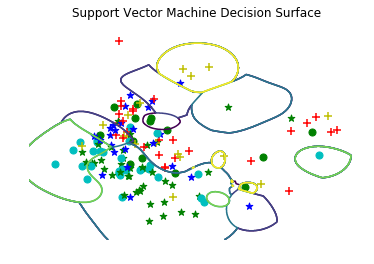

In [35]:
for i in range(0, X_train.shape[0]):
    if y_train[i] == 1:
        c1 = pl.scatter(X_train[i,0], X_train[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 2:
        c2 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 3:
        c3 = pl.scatter(X_train[i,0], X_train[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 4:
        c4 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='*')
    elif y_train[i] == 5:
        c5 = pl.scatter(X_train[i,0], X_train[i,1],c='c',    s=50,marker='o')
    elif y_train[i] == 6:
        c6 = pl.scatter(X_train[i,0], X_train[i,1],c='y',    s=50,marker='+') 
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = rbf_svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [36]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc.fit(X_train, y_train)

/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

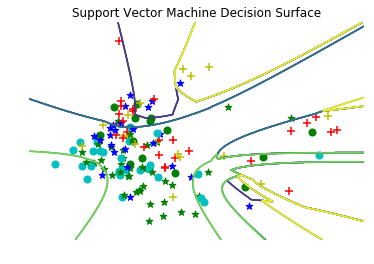

In [37]:
for i in range(0, X_train.shape[0]):
    if y_train[i] == 1:
        c1 = pl.scatter(X_train[i,0], X_train[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 2:
        c2 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 3:
        c3 = pl.scatter(X_train[i,0], X_train[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 4:
        c4 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='*')
    elif y_train[i] == 5:
        c5 = pl.scatter(X_train[i,0], X_train[i,1],c='c',    s=50,marker='o')
    elif y_train[i] == 6:
        c6 = pl.scatter(X_train[i,0], X_train[i,1],c='y',    s=50,marker='+') 
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = poly_svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [38]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

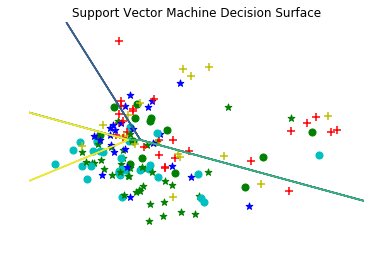

In [39]:
for i in range(0, X_train.shape[0]):
    if y_train[i] == 1:
        c1 = pl.scatter(X_train[i,0], X_train[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 2:
        c2 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 3:
        c3 = pl.scatter(X_train[i,0], X_train[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 4:
        c4 = pl.scatter(X_train[i,0], X_train[i,1],c='g',    s=50,marker='*')
    elif y_train[i] == 5:
        c5 = pl.scatter(X_train[i,0], X_train[i,1],c='c',    s=50,marker='o')
    elif y_train[i] == 6:
        c6 = pl.scatter(X_train[i,0], X_train[i,1],c='y',    s=50,marker='+') 
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = lin_svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [40]:
y_predict = lin_svc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6]))
confusion = pd.DataFrame(cm, index = ['N.America', 'S.America', 
                                      'Europe', 'Africa', 'Asia',
                                     'Oceania'], 
                         columns = ['predicted N.America', 
                                    'predicted S.America', 
                                      'predicted Europe', 
                                    'predicted Africa',
                                    'predicted Asia',
                                     'predicted Oceania'])
confusion

,predicted N.America,predicted S.America,predicted Europe,predicted Africa,predicted Asia,predicted Oceania
N.America,2,0,0,2,0,0
S.America,3,0,0,0,0,0
Europe,1,0,1,7,1,0
Africa,0,0,1,11,0,0
Asia,1,0,1,4,1,0
Oceania,2,0,0,1,0,0


In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.22      0.50      0.31         4
           2       0.00      0.00      0.00         3
           3       0.33      0.10      0.15        10
           4       0.44      0.92      0.59        12
           5       0.50      0.14      0.22         7
           6       0.00      0.00      0.00         3

    accuracy                           0.38        39
   macro avg       0.25      0.28      0.21        39
weighted avg       0.33      0.38      0.29        39



/home/mikhailova-es/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
lin_svc.support_vectors_

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

In [ ]:
poly_svc.support_vectors_.shape

In [ ]:
rbf_svc.support_vectors_.shape

In [ ]:
svc.support_vectors_.shape

In [ ]:
new_svc_model.support_vectors_.shape